<a href="https://colab.research.google.com/github/HARSH-0000/blood-pressure-analysis/blob/main/blood_pressure_prediction_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [188]:
df=pd.read_csv('/content/patient_data.csv')

In [189]:
df.head()

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)


In [190]:
df.rename(columns={'C':'Gender'},inplace=True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [192]:
df.shape

(1825, 14)

In [193]:
df.Stages.value_counts()

,count
Stages,
HYPERTENSION (Stage-1),648
HYPERTENSION (Stage-2),599
NORMAL,336
HYPERTENSIVE CRISIS,240
HYPERTENSION (Stage-2).,1
HYPERTENSIVE CRISI,1


In [194]:
df['Stages'] = df['Stages'].str.strip().str.rstrip('.')
df['Stages'] = df['Stages'].replace({
    'HYPERTENSIVE CRISI': 'HYPERTENSIVE CRISIS'})


In [195]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

In [196]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
unique,2,4,2,2,3,3,2,2,3,3,5,5,2,4
top,Female,51-64,Yes,No,No,Moderate,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
freq,913,475,1657,984,744,697,976,940,984,625,1008,708,984,648


In [197]:
for c in df.columns:
    print(c, ":", df[c].unique())

Gender : ['Male' 'Female']
Age : ['18-34' '35-50' '51-64' '65+']
History : ['Yes' 'No']
Patient : ['No' 'Yes']
TakeMedication : ['No' 'Yes ' 'Yes']
Severity : ['Mild' 'Sever' 'Moderate']
BreathShortness : ['No' 'Yes']
VisualChanges : ['No' 'Yes']
NoseBleeding : ['No ' 'No' 'Yes']
Whendiagnoused : ['<1 Year' '1 - 5 Years' '>5 Years']
Systolic : ['111 - 120' '121- 130' '130+' '100+' '121 - 130']
Diastolic : ['81 - 90' '91 - 100' '100+' '130+' '70 - 80']
ControlledDiet : ['No' 'Yes']
Stages : ['HYPERTENSION (Stage-1)' 'HYPERTENSION (Stage-2)' 'HYPERTENSIVE CRISIS'
 'NORMAL']


In [198]:
df['TakeMedication'] = df['TakeMedication'].str.strip().str.lower()
df['NoseBleeding'] = df['NoseBleeding'].str.strip().str.lower()

In [199]:
gender_counts=df['Gender'].value_counts()
print(gender_counts)

Gender
Female    913
Male      912
Name: count, dtype: int64


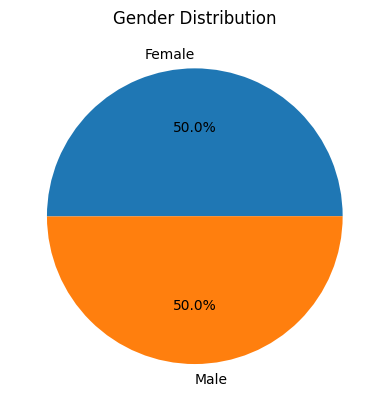

In [200]:
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

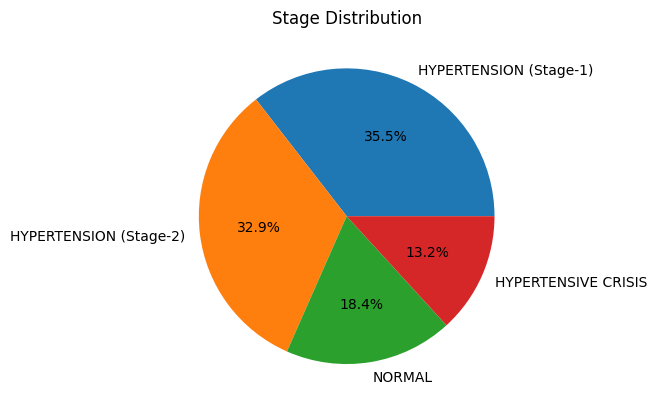

In [201]:
stage_count = df['Stages'].value_counts()
plt.pie(stage_count, labels=stage_count.index, autopct='%1.1f%%')
plt.title('Stage Distribution')
plt.show()

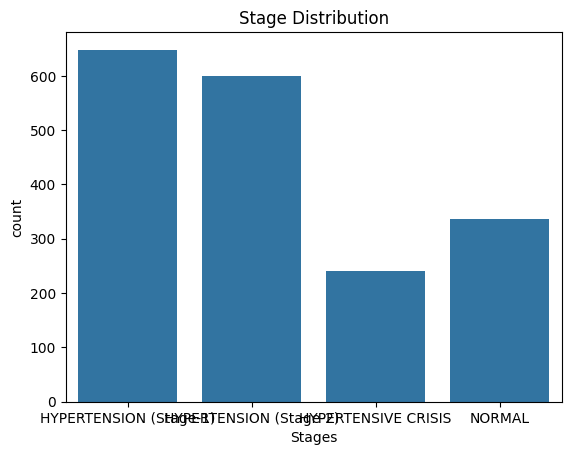

In [202]:
sns.countplot(data=df,x='Stages')
plt.title('Stage Distribution')
plt.show()

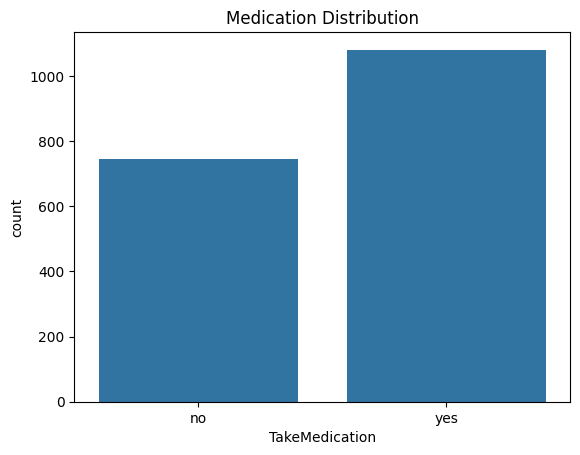

In [203]:
sns.countplot(data=df,x='TakeMedication')
plt.title('Medication Distribution')
plt.show()

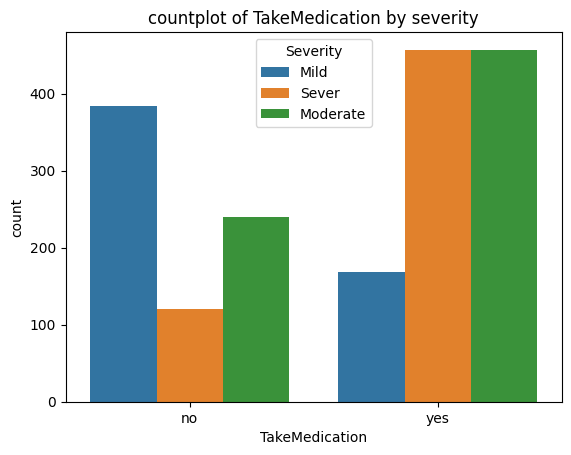

In [204]:
sns.countplot(data=df,x='TakeMedication',hue='Severity')
plt.title('countplot of TakeMedication by severity')
plt.show()

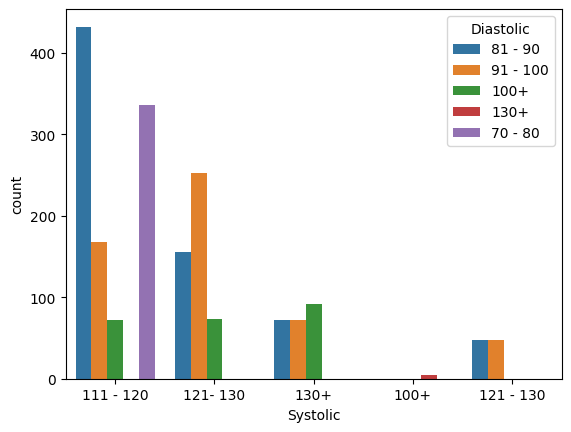

In [205]:
sns.countplot(data=df,x='Systolic',hue='Diastolic')
plt.show()

In [206]:
from sklearn.preprocessing import LabelEncoder
columns=['Gender','Age','History','Patient','TakeMedication','Severity','BreathShortness','VisualChanges','NoseBleeding','ControlledDiet','Stages', 'Whendiagnoused', 'Systolic', 'Diastolic']
le=LabelEncoder()
for col in columns:
  df[col]=le.fit_transform(df[col])

In [207]:
x=df.drop('Stages',axis=1)
y=df['Stages']

In [208]:
y

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
1820,3
1821,3
1822,3
1823,3


In [209]:
df.sample(10)

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
1412,1,1,1,1,1,1,1,1,1,2,1,4,1,1
1139,1,2,1,0,0,1,0,1,0,2,1,3,0,0
1583,1,3,0,0,0,1,0,0,0,2,1,2,0,3
1052,0,0,1,1,1,1,1,1,1,1,1,3,1,1
163,0,2,1,1,1,1,1,1,1,2,4,4,1,2
814,1,0,1,0,1,1,1,0,0,0,1,3,0,0
537,1,0,1,1,1,0,1,1,0,2,3,3,1,1
20,0,1,1,0,0,2,0,0,0,1,1,3,0,0
1638,0,2,1,0,0,0,0,0,0,0,1,2,0,3
1371,1,1,1,0,0,0,0,0,0,1,3,0,0,0


In [210]:
x

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,0,1,0,0,0,0,0,0,1,1,3,0
1,0,0,1,0,0,0,0,0,0,1,1,3,0
2,1,1,1,0,0,0,0,0,0,1,1,3,0
3,0,1,1,0,0,0,0,0,0,1,1,3,0
4,1,2,1,0,0,0,0,0,0,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,0,1,1,0,0,2,0,0,0,2,1,2,0
1821,1,2,1,0,0,2,0,0,0,2,1,2,0
1822,0,2,1,0,0,2,0,0,0,2,1,2,0
1823,1,3,1,0,0,2,0,0,0,2,1,2,0


In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

acc1 = accuracy_score(y_test,y_pred)
print(f"acc1: {acc1}")
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

acc1: 0.9726027397260274
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       128
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00        53
           3       0.93      0.93      0.93        69

    accuracy                           0.97       365
   macro avg       0.97      0.97      0.97       365
weighted avg       0.97      0.97      0.97       365



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc1}")
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

acc2 = accuracy_score(y_test,y_pred)
print(f"acc2: {acc2}")
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

acc2: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        69

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [243]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

acc3 = accuracy_score(y_test,y_pred)
print(f"acc3: {acc3}")
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

acc3: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       115
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        69

    accuracy                           1.00       365
   macro avg       1.00      1.00      1.00       365
weighted avg       1.00      1.00      1.00       365



In [245]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

acc4 = accuracy_score(y_test,y_pred)
print(f"acc4: {acc4}")
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

acc4: 0.9178082191780822
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      0.74      0.85       115
           2       0.64      1.00      0.78        53
           3       1.00      1.00      1.00        69

    accuracy                           0.92       365
   macro avg       0.91      0.93      0.91       365
weighted avg       0.95      0.92      0.92       365



In [246]:
from sklearn.naive_bayes import MultinomialNB

mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

acc5 = accuracy_score(y_test,y_pred)
print(f"acc5: {acc5}")
report = classification_report(y_test,y_pred)
print("Classification Report:\n", report)

acc5: 0.8164383561643835
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       128
           1       0.84      0.95      0.89       115
           2       0.85      0.62      0.72        53
           3       0.82      0.54      0.65        69

    accuracy                           0.82       365
   macro avg       0.82      0.76      0.78       365
weighted avg       0.82      0.82      0.81       365



In [222]:
import pickle
import warnings
pickle.dump(rf,open('model.pkl','wb'))


In [247]:
model =pd.DataFrame({'model':['LogisticRegression','RandomForestClassifier','DecisionTreeClassifier','GaussianNB','MultinomialNB'],
       'score':[acc1,acc2,acc3,acc4,acc5],
                     })
print(model)

                    model     score
0      LogisticRegression  0.972603
1  RandomForestClassifier  1.000000
2  DecisionTreeClassifier  1.000000
3              GaussianNB  0.917808
4           MultinomialNB  0.816438
